In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# importing bikes dataset
bikes = pd.read_csv("nyc-east-river-bicycle-counts.csv", header = 0)
bikes.drop('Unnamed: 0', axis = 1, inplace = True)
bikes.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [7]:
bikes.dtypes

Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

Skewness: -0.242981
Kurtosis: -0.907534


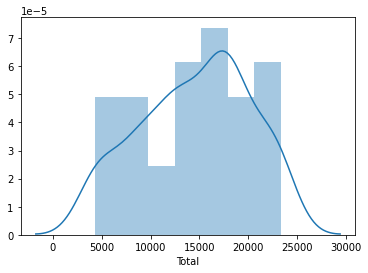

In [8]:
sns.distplot(bikes['Total']);

#skewness and kurtosis
print("Skewness: %f" % bikes['Total'].skew())
print("Kurtosis: %f" % bikes['Total'].kurt())

In [9]:
bikes['Average Temp'] = (bikes['High Temp (°F)'] + bikes['Low Temp (°F)'])/2

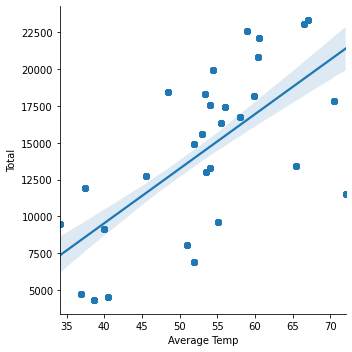

In [10]:
sns.lmplot('Average Temp', 'Total', data=bikes)

In [11]:
import statsmodels.api as sm

X = bikes['Average Temp']
y = bikes['Total']

# add intercept to input variable
X = sm.add_constant(X)

# fit poisson regression model 
model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# add poisson fitted values to dataframe
bikes['reg_fit'] = model.fittedvalues

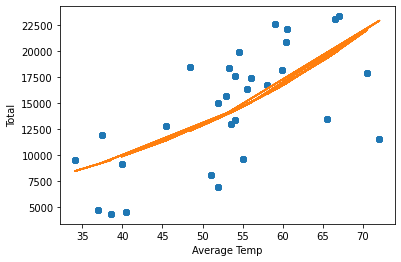

In [12]:
sns.regplot(bikes['Average Temp'], bikes['Total'], fit_reg=False)
plt.plot(bikes['Average Temp'], bikes['reg_fit']);